## Path to Source

In [1]:
# load local version before pip installed version, for debugging
import sys
import pathlib

sys.path.append(pathlib.Path(__file__).parent.parent.joinpath("src"))

## Imports

In [2]:
import yt

from gallifrey.data.load import load_snapshot
from gallifrey.halo import MainHalo
from gallifrey.utilities.time import Timer

## Load Data

In [3]:
snapshot = 127
resolution = 4096
sim_id = "09_18"

In [4]:
ds = load_snapshot(snapshot, resolution)
mw = MainHalo("MW", resolution, ds, sim_id=sim_id)


      DETECTED LOCAL MACHINE: Test snapshot loaded.

yt : [INFO     ] 2023-02-23 08:44:29,299 Calculating time from 1.000e+00 to be 4.318e+17 seconds
yt : [INFO     ] 2023-02-23 08:44:29,362 Parameters: current_time              = 4.318436660023809e+17 s
yt : [INFO     ] 2023-02-23 08:44:29,363 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-02-23 08:44:29,364 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-02-23 08:44:29,364 Parameters: domain_right_edge         = [100. 100. 100.]
yt : [INFO     ] 2023-02-23 08:44:29,365 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-02-23 08:44:29,365 Parameters: current_redshift          = 4.440892098500626e-16
yt : [INFO     ] 2023-02-23 08:44:29,366 Parameters: omega_lambda              = 0.682
yt : [INFO     ] 2023-02-23 08:44:29,366 Parameters: omega_matter              = 0.318
yt : [INFO     ] 2023-02-23 08:44:29,367 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 202

## Plots

yt : [INFO     ] 2023-02-23 08:45:16,972 Allocating for 1.920e+08 particles
Loading particle index: 100%|███████████████| 245/245 [00:00<00:00, 2903.97it/s]
yt : [INFO     ] 2023-02-23 08:45:32,468 xlim = -0.018637 0.018637
yt : [INFO     ] 2023-02-23 08:45:32,469 ylim = -0.018637 0.018637
yt : [INFO     ] 2023-02-23 08:45:32,469 zlim = -50.000000 50.000000
yt : [INFO     ] 2023-02-23 08:45:32,474 Making a fixed resolution buffer of (('PartType0', 'GFM_Metallicity')) 800 by 800



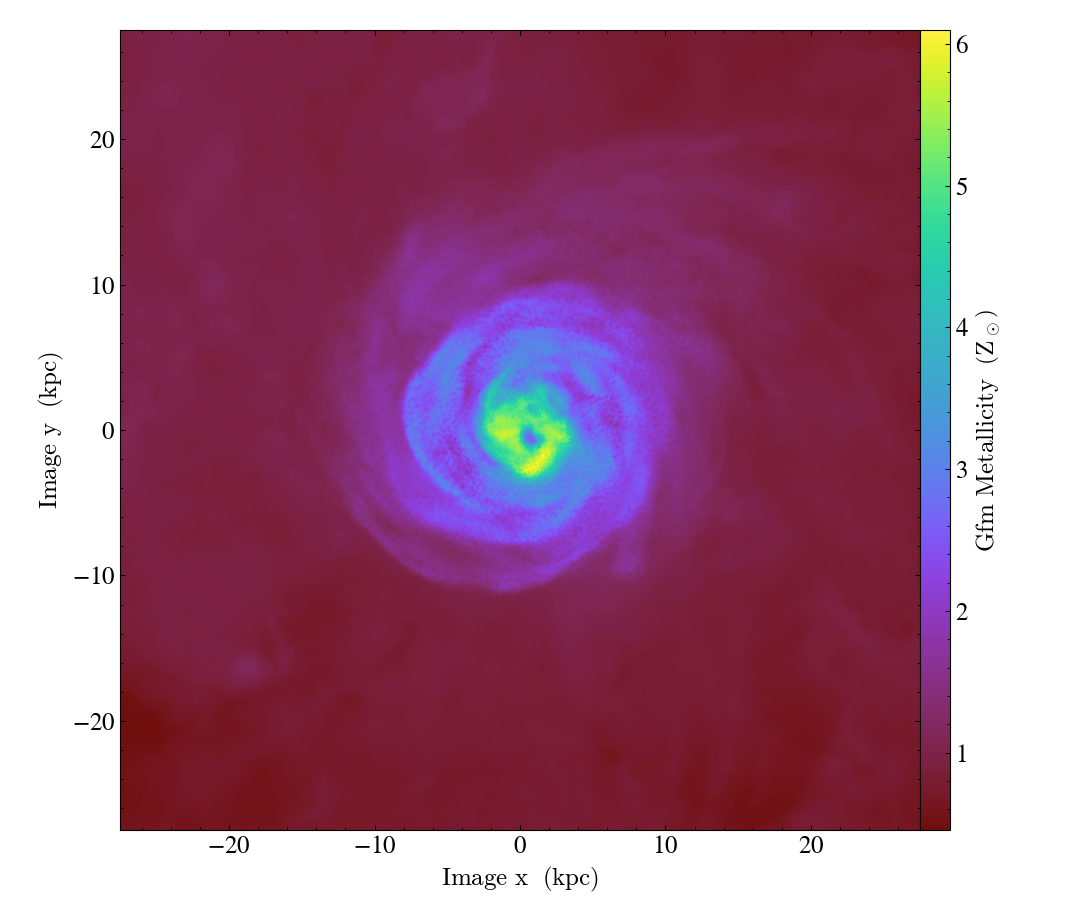

In [7]:
# gas density-weighted gas metallicity
p = yt.ProjectionPlot(
    ds,
    #normal='z',
    normal=mw.sphere().quantities.angular_momentum_vector(),
    fields=("PartType0", "GFM_Metallicity"),
    weight_field=("PartType0", "density"),
    data_source=mw.sphere(),
    center=mw.centre(),
    width=(55, "kpc"),
)

p.set_unit(("PartType0", "GFM_Metallicity"), "Zsun")
p.set_log(("PartType0", "GFM_Metallicity"), False)
p.show()

In [ ]:
# stellar metallicities
p = yt.ParticleProjectionPlot(
    ds,
    axis='z',
    fields=("PartType4", "GFM_Metallicity"),
    weight_field=("PartType4", "particle_ones"),
    data_source=mw.sphere(ds),
    center=mw.centre(ds),
    width=(55, "kpc"),
)
p.set_unit(("PartType4", "GFM_Metallicity"), "Zsun")
p.set_log(("PartType4", "GFM_Metallicity"), False)
p.set_zlim(("PartType4", "GFM_Metallicity"), zmin=(0, "Zsun"), zmax=(6, "Zsun"))
p.show()